# Ford GoBike System Data Exploration
## by Siqi Wan

## Preliminary Wrangling

This dataset is Bay Wheels's trip data for public use. This data is provided according to the Bay Wheels License Agreement. The dataset including bike rental trip information and contains data 2017-2020/03

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None 

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
path = '/Users/xiangyuli/Desktop/Udacity - DA/Project 4 - Data Visulization/Project Template/Rawdata/'
res = pd.DataFrame()
col_list = ['duration_sec', 'start_time', 'end_time', 'start_station_id',
           'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name',
           'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']
for files in os.listdir(path):
    if '.csv' in files:
        data = pd.read_csv(path + files, header=1, usecols = col_list,names=col_list)
        res = pd.concat([data,res])
    

In [3]:
res.shape

(5795383, 13)

In [4]:
res.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.000,The Embarcadero at Steuart St,37.791,-122.391,81.000,Berry St at 4th St,37.776,-122.393,2535,Customer
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.000,Market St at Dolores St,37.769,-122.427,3.000,Powell St BART Station (Market St at 4th St),37.786,-122.405,5905,Customer
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.000,Grove St at Masonic Ave,37.775,-122.447,70.000,Central Ave at Fell St,37.773,-122.444,6638,Subscriber
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.000,Frank H Ogawa Plaza,37.805,-122.272,222.000,10th Ave at E 15th St,37.793,-122.249,4898,Subscriber
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.000,4th St at Mission Bay Blvd S,37.770,-122.391,323.000,Broadway at Kearny,37.798,-122.406,5200,Subscriber


In [5]:
res['duration_sec'] = res['duration_sec'].astype(float)
res = res.dropna()

### What is the structure of your dataset?

The data row records every ride and it's related information, including ride start and end time, station information(Id, Geo location) and User type(Subscriber or Customer). Columns including below:
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### What is/are the main feature(s) of interest in your dataset?

Main features of interest in the dataset are trip duration, start and end station latitude/longtitude, user type. And the main interest is to understand below questions:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?
4. Which station is the most popular station?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features will support investigation are:
1. Trip duration
2. Start station Latitude
3. Start Station Longitude
4. End Station Latitude
5. End Station Longtitude
6. User Type
7. Start Time and Date
8. End Time and Date

## Univariate Exploration

In this session we will look at the feature duration_sec, user_type, start/end station Id. This section will answer questions below:

1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Look at variable duration_sec, there are unusual values like >80000 so looking at data with duration_sec more than 20000. Turns out the number of records with >3000 trip duration are really small(1.8% of all data), so treat these at outliers and delete those data.

In [6]:
res['duration_sec'].describe()
# Only 1.8% of records has trip duration more than 3000, so deleting those records from the dataset.
res[res['duration_sec'] > 3000]['duration_sec'].value_counts().sum() / 5795383 * 100
less_than_3k = res[res['duration_sec'] <= 3000]

count   5124331.000
mean        853.557
std        2269.044
min          60.000
25%         358.000
50%         567.000
75%         885.000
max       86369.000
Name: duration_sec, dtype: float64

1.7790713745752438

In [10]:
bins = np.arange(60, less_than_3k['duration_sec'].max() + 1, 20)


The average trip duration: 671.8803316400553
The median trip duration: 558.0


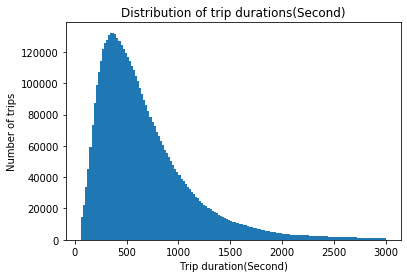

In [18]:
p = plt.hist(less_than_3k['duration_sec'], bins = bins)
xlabel = plt.xlabel('Trip duration(Second)')
ylabel = plt.ylabel('Number of trips')
title = plt.title('Distribution of trip durations(Second)')
print("The average trip duration: " + str(less_than_3k['duration_sec'].mean()))
print("The median trip duration: " + str(less_than_3k['duration_sec'].median()))

#### From the trip duration distribution we can see:
1. the trip distribution is right skewed
2. The average trip duration: 671.88 and The median trip duration: 558.0

#### next step is looking at the distribution among different user types - suscriber vs customer.

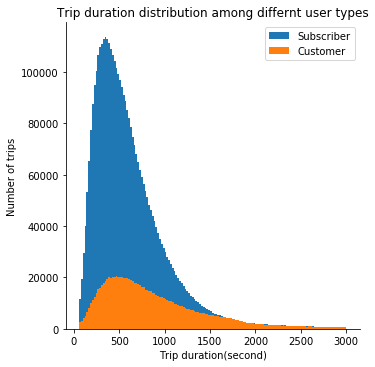

In [20]:
# Plot distribution among different user types
g = sb.FacetGrid(data = less_than_3k, hue = 'user_type',height = 5)
bins = np.arange(60, less_than_3k['duration_sec'].max() + 1, 20)
p = g.map(plt.hist,'duration_sec',bins = bins)
legend = plt.legend()
xlabel = plt.xlabel('Trip duration(second)')
ylabel = plt.ylabel('Number of trips')
title = plt.title('Trip duration distribution among differnt user types')


#### From above distribution we observed:
1. Subscribers and customer trip duration distribution are all right skewed with majority trip duration around 500 seconds.
2. Our dataset has more subscriber data points compares to customer data points.
3. With the trip duration increase, the delta between number of trips for subscriber vs customer is not obvious anymore. This could because:
    a. lack of data(less than 5000 records)
    b. it is also possbile that for users that trips more than 1500 seconds, there is not difference in the number of subscriber trips and customer trips.
    
#### For next step, we are going to look at the user type feature to generate more insights like:
1. Which user type has more trip?
2. Does the average trip duration varies between two user type?

Text(0.5, 0, 'User Type')

Text(0, 0.5, 'Number of Trips')

Text(0.5, 1.0, 'Number of trips among different user type')

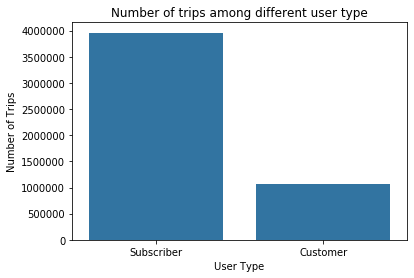

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(data=less_than_3k, x = 'user_type' ,color = base_color)
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of trips among different user type')

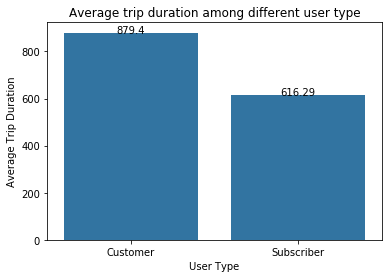

In [22]:
groupedvalues = less_than_3k.groupby('user_type').mean().reset_index()
base_color = sb.color_palette()[0]
g = sb.barplot(data=groupedvalues, x = 'user_type', y = 'duration_sec' ,color = base_color)
for index, row in groupedvalues.iterrows():
    i = g.text(row.name,row.duration_sec, round(row.duration_sec,2), color='black', ha="center")
xlabel = plt.xlabel('User Type')
ylabel = plt.ylabel('Average Trip Duration')
title = plt.title('Average trip duration among different user type')

#### From the above plot we can conclude:
1. Which user type has more trip?

Answer: The subscriber user group has more trips.

2. Does the average trip duration varies between two user type?

Answer: The average trip duration does varies bettwen customer and subscriber group. Customer group has higher average trip duration of 879.4 seconds, which about 250 more seconds than subscriber group.

#### Next section we are going to explore the variable Start Time and Date to answer below questions:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?

In [23]:
## Data prep: Adding the month, year, dayofweek, hour column into dataset
less_than_3k['month'] = pd.to_datetime(less_than_3k['start_time']).dt.month
less_than_3k['year'] = pd.to_datetime(less_than_3k['start_time']).dt.year
less_than_3k['dayofweek'] = pd.to_datetime(less_than_3k['start_time']).dt.day_name()
less_than_3k['hour'] = pd.to_datetime(less_than_3k['start_time']).dt.hour


In [24]:
less_than_3k.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,year,dayofweek,hour
3,1585.000,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.000,Frank H Ogawa Plaza,37.805,-122.272,222.000,10th Ave at E 15th St,37.793,-122.249,4898,Subscriber,2,2019,Thursday,23
4,1793.000,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.000,4th St at Mission Bay Blvd S,37.770,-122.391,323.000,Broadway at Kearny,37.798,-122.406,5200,Subscriber,2,2019,Thursday,23
5,1147.000,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.000,Palm St at Willow St,37.317,-121.885,312.000,San Jose Diridon Station,37.330,-121.902,3803,Subscriber,2,2019,Thursday,23
6,1615.000,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.000,Washington St at Kearny St,37.795,-122.405,127.000,Valencia St at 21st St,37.757,-122.421,6329,Subscriber,2,2019,Thursday,23
7,1570.000,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.000,Washington St at Kearny St,37.795,-122.405,127.000,Valencia St at 21st St,37.757,-122.421,6548,Subscriber,2,2019,Thursday,23


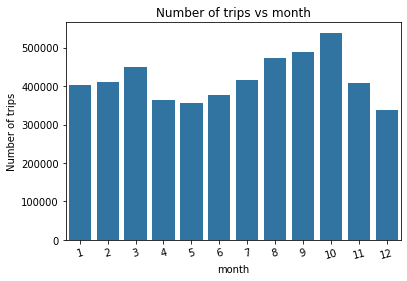

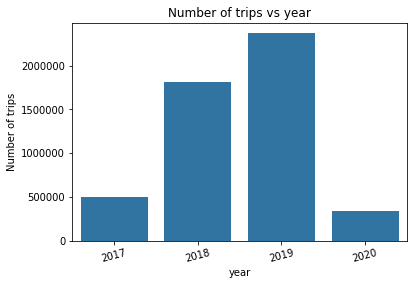

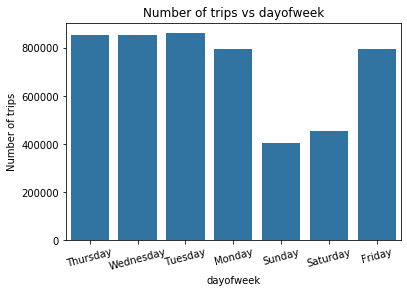

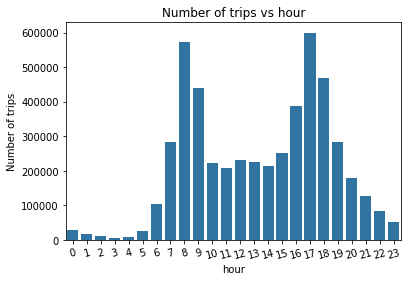

In [27]:
column_list = ['month','year','dayofweek','hour']
for i in column_list:
    p = sb.countplot(data=less_than_3k, x = i ,color = base_color)
    title = plt.title('Number of trips vs ' + i)
    ylabel = plt.ylabel('Number of trips')
    xticks = plt.xticks(rotation=15)
    plt.show()

#### From the above plot we can conclude:
1. Most trips are taken in March, Sept and Oct.
2. Most trips are taken on Tuesday, Wednesday and Thursday, which make sense since these days are busy working days.
3. Peak hours for trips are 7-9am and 16-19pm, which also make sense about since these are commuting hours.

#### Next section we'll look into the start information to see which station is in high demand. This will answer the below question:
1. Which station is most popular?

In [31]:
less_than_3k.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,year,dayofweek,hour
3,1585.000,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.000,Frank H Ogawa Plaza,37.805,-122.272,222.000,10th Ave at E 15th St,37.793,-122.249,4898,Subscriber,2,2019,Thursday,23
4,1793.000,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.000,4th St at Mission Bay Blvd S,37.770,-122.391,323.000,Broadway at Kearny,37.798,-122.406,5200,Subscriber,2,2019,Thursday,23
5,1147.000,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.000,Palm St at Willow St,37.317,-121.885,312.000,San Jose Diridon Station,37.330,-121.902,3803,Subscriber,2,2019,Thursday,23
6,1615.000,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.000,Washington St at Kearny St,37.795,-122.405,127.000,Valencia St at 21st St,37.757,-122.421,6329,Subscriber,2,2019,Thursday,23
7,1570.000,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.000,Washington St at Kearny St,37.795,-122.405,127.000,Valencia St at 21st St,37.757,-122.421,6548,Subscriber,2,2019,Thursday,23


In [32]:
count_station = less_than_3k.groupby('start_station_name').count().reset_index().sort_values('start_station_id',ascending = False).head(20)



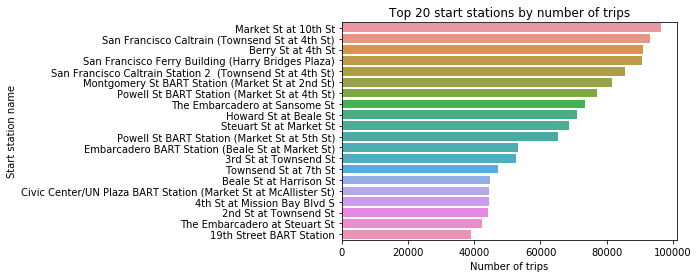

In [33]:
p = sb.barplot(data=count_station, x = 'start_station_id', y='start_station_name')
xlabel = plt.xlabel('Number of trips')
ylabel = plt.ylabel('Start station name')
title = plt.title('Top 20 start stations by number of trips')

#### From the above we can conclude:
1. Which station is most popular?

Answer: The Market St at 10th St, San Francisco Caltrian and Berry St at 4th St are three most popular start station among all the stations.

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your
data. This section is targeting to answer questions below:
1. Relationship between trip duration and user types
2. Relationship between trip duration and hour of the day

### 1. Trip duration vs user types


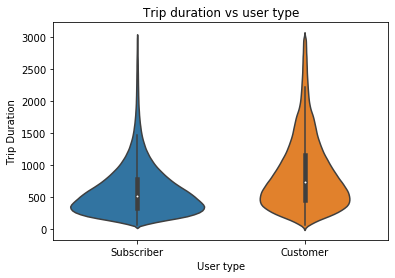

In [35]:
p = sb.violinplot(data=less_than_3k, x='user_type', y='duration_sec')
xlabel = plt.xlabel('User type')
ylabel = plt.ylabel('Trip Duration')
title = plt.title('Trip duration vs user type')

#### For the above chart we can conclude:
The customer group has higher median trip duration value and meanwhile subscriber group has more data in the dataset.

### 2. Trip duration vs hours of the day 



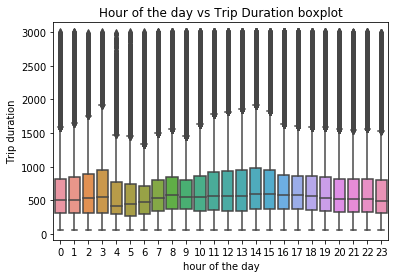

In [36]:
p = sb.boxplot(data=less_than_3k, x='hour', y='duration_sec')
xlabel = plt.xlabel('hour of the day')
ylabel = plt.ylabel('Trip duration')
title = plt.title('Hour of the day vs Trip Duration boxplot')

#### From the plot above we will able to conclude:
1. There is an increasing trend in the median trip duration from 4-9am. 
2. The median trip duration started to decrease from 15pm.

## Multivariate Exploration

For this section, we are going to look at for top 10 popular station, what's relationship between the trip duration for different hours of the day, for different user group.

In [38]:
## Prepare data
count_station = less_than_3k.groupby('start_station_name').count().reset_index().sort_values('start_station_id',ascending = False).head(10)
station_list = list(count_station['start_station_name'])
top20_station = less_than_3k[less_than_3k['start_station_name'].isin(station_list)]


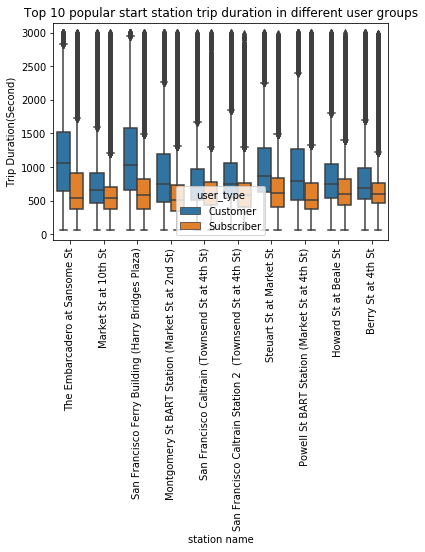

In [39]:
# g = sb.FacetGrid(data=top20_station, col='user_type')
# g.map(plt.plot,'duration_sec')
# plt.xticks(rotation=45)

p = sb.boxplot(data=top20_station, x='start_station_name', y='duration_sec',hue='user_type',dodge=True)
xticks = plt.xticks(rotation = 90)
xlabel = plt.xlabel('station name')
ylabel = plt.ylabel('Trip Duration(Second)')
title = plt.title('Top 10 popular start station trip duration in different user groups')

#### From the above chart we can make the following conclusion:
1. There are two stations(The embarcadero at sansome st and san francisco ferry building), the trip duration median value between customer and subscriber is large. Subscribers starts at these two station has longer trip duration compares to customer group.